First 5 rows of dataset:
    age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Accuracy: 0.8909358879882093

Classification Report:
               precision    rec

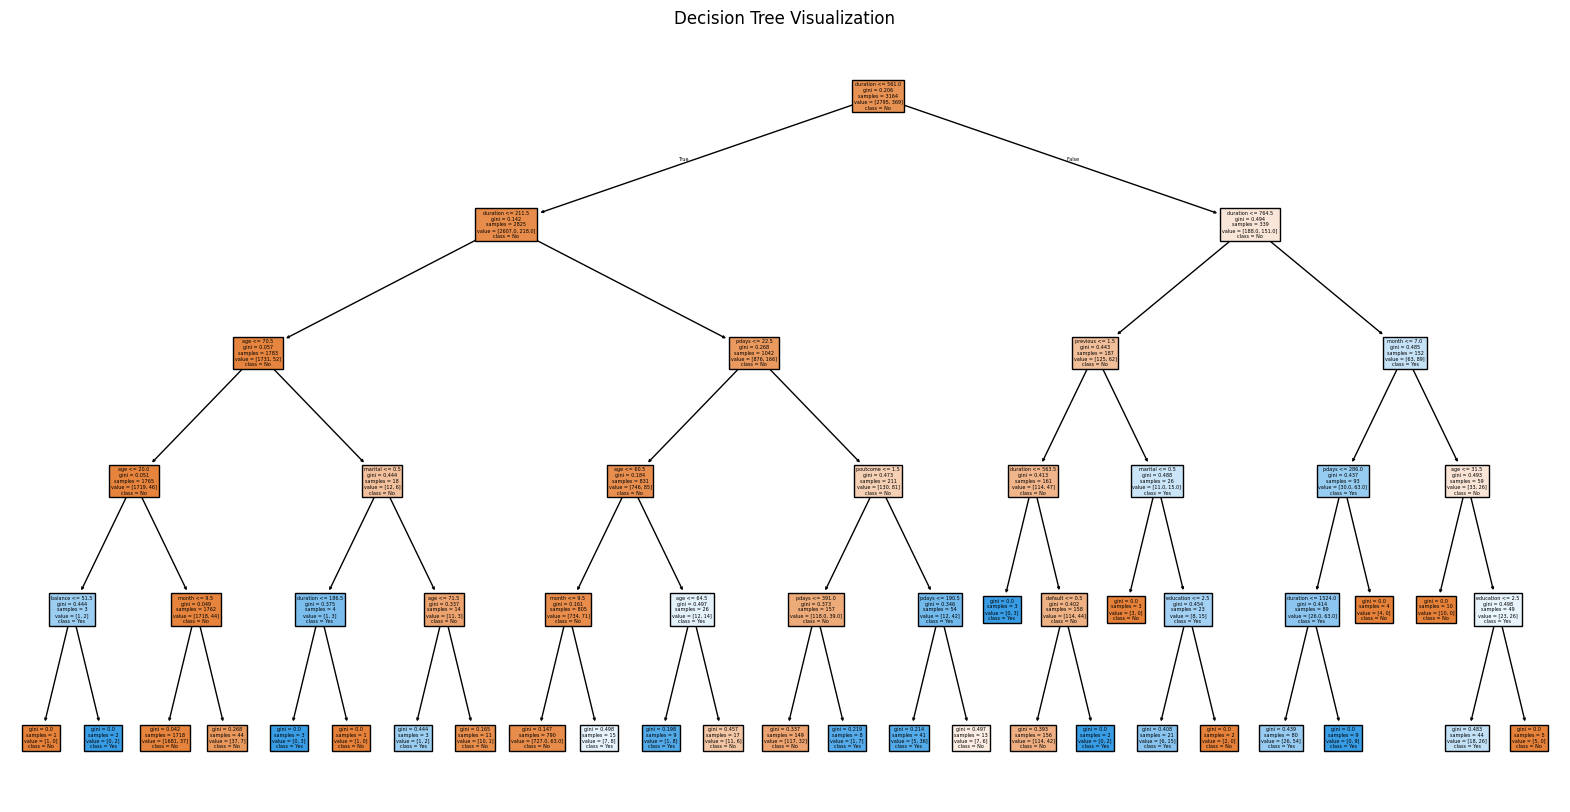

In [1]:
# -------------------------------------------
# Import libraries
# -------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------------------------
# Load dataset (from local file after download)
# -------------------------------------------

# Read CSV file (change path if you save elsewhere)
data = pd.read_csv("bank.csv", sep=';')

# Preview data
print("First 5 rows of dataset:\n", data.head())

# -------------------------------------------
# Preprocessing
# -------------------------------------------

# Label Encoding for categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split into features and target
X = data.drop("y", axis=1)
y = data["y"]

# -------------------------------------------
# Train-test split
# -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------------------------------
# Build and train decision tree classifier
# -------------------------------------------
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# -------------------------------------------
# Model Evaluation
# -------------------------------------------
y_pred = clf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -------------------------------------------
# Visualize the Decision Tree
# -------------------------------------------
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()